In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from matplotlib import pyplot as plt

Загружаем данные

In [42]:
DF_Titanic = pd.read_csv(r'D:\Netology\ML\train.csv')

In [43]:
DF_Titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [44]:
DF_Titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


У нас в датасете 891 запись. \
В признаках "Age" (177), "Cabin" (687) и "Embarked" (2) есть отсутствующие значения

Избавимся от всех пустых значений и удалим категориальные переменные

In [45]:
DF_Titanic_nonull = DF_Titanic
DF_Titanic_nonull = DF_Titanic.dropna()[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
DF_Titanic_nonull.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
1,1,1,38.0,1,0,71.2833
3,1,1,35.0,1,0,53.1000
6,0,1,54.0,0,0,51.8625
10,1,3,4.0,1,1,16.7000
11,1,1,58.0,0,0,26.5500


In [46]:
DF_Titanic_nonull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  183 non-null    int64  
 1   Pclass    183 non-null    int64  
 2   Age       183 non-null    float64
 3   SibSp     183 non-null    int64  
 4   Parch     183 non-null    int64  
 5   Fare      183 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 10.0 KB


После удаления всех пропусков у нас осталось всего 20% значений. То есть 80% данных мы удалили. 

Разделяем на тренировочные и тестовые данные и обучаем модель на этих необработанных данных

In [47]:
X_train, X_test, y_train, y_test = train_test_split(DF_Titanic_nonull.drop(columns='Survived'), DF_Titanic_nonull['Survived'], test_size=0.20, random_state=50)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7297297297297297

Получили точность 73%.

Удаляем неинформативные признаки:

"PassengerId" - неинформативен, так как является просто случаным набором цифр.\
"Ticket" - также является просто случаным набором цифр, либо порядком, в которм были куплены билеты.\
"Name" - вряд ли имя влияет на выживаемость.\
"Cabin" - содержит очень много пропусков.

In [48]:
DF_Titanic_ = DF_Titanic
DF_Titanic_.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True, axis=1)

DF_Titanic_.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [49]:
DF_Titanic_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


Заполним отсутствующие данные самым распространенным значением

In [50]:
DF_Titanic_['Age'].fillna(int(DF_Titanic_['Age'].mode()), inplace=True)
DF_Titanic_.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


Заполним два недостающих значения самым популярным портом.

In [51]:
le = LabelEncoder()
DF_Titanic_['Embarked'] = le.fit_transform(DF_Titanic_['Embarked'])
DF_Titanic_['Embarked'].fillna(int(DF_Titanic_['Embarked'].mode()), inplace=True)

DF_Titanic_.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,2
1,1,1,female,38.0,1,0,71.2833,0
2,1,3,female,26.0,0,0,7.9250,2
3,1,1,female,35.0,1,0,53.1000,2
4,0,3,male,35.0,0,0,8.0500,2


Преобразуем категориальный признак "Sex"

In [52]:
DF_Titanic_['Sex'] = le.fit_transform(DF_Titanic_['Sex'])

DF_Titanic_.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [53]:
DF_Titanic_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int32  
dtypes: float64(2), int32(2), int64(4)
memory usage: 48.9 KB


Проводим рассчет на очищенных данных

In [54]:
X_train, X_test, y_train, y_test = train_test_split(DF_Titanic_.drop(columns='Survived'), DF_Titanic_['Survived'], test_size=0.20, random_state=50)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

model_ = LogisticRegression()
model_.fit(X_train, y_train)
model_.score(X_test, y_test)

0.7932960893854749

Из интереса посмотрим, как количество детей влияет на выжываемость.

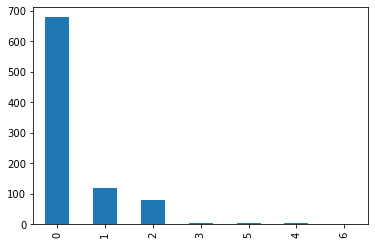

In [22]:
DF_Titanic_['Parch'].value_counts().plot(kind='bar');

В принципе очевидная взаимосвяз подтверждается. Без детей спаситсь проще. Но и с увеличением количества детей в семье количество семей снижается

В данной работе мы провели следущие преобразования:\
Мы убрали все пропуски, или заменили их. Преобразовали категории в цифры, чтобы модель могла обучаться. А также убрали неинформативные признаки.

После всех преобразований качество модели вырасло на 6 процентов.

Думаю преобразование данных делать нужно. Но стоит возможно сравнивать работу модлей с разным количеством преобразований, если позволяют ресурсы